In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const


In [2]:
.25e6**2/.5e6

125000.0

# Generate White Noise

In [5]:
def band_limited_noise(center_freqs,bandwidth, amplitude=1,samples=1.e6, samplerate=1.e6): #samples=10.e4, samplerate=200100):
    signals=[]
    t = np.linspace(0, samples/samplerate, samples)
    if type(center_freqs)==float:
        center_freqs=[center_freqs]
    freqs=np.array([])
    for cent in center_freqs:
        min_freq, max_freq=cent-bandwidth/2.,cent+bandwidth/2.
        freqs = np.append(freqs,np.arange(min_freq, max_freq+1, samples/samplerate))
    phases = np.random.rand(len(freqs))*2*np.pi
    signal=np.zeros(len(t))
    for freq,phase in zip(freqs,phases):
        signal += np.sin(2*np.pi*freq*t + phase)
        
    #signal = reduce(lambda a,b: a+b,signals)
    #signal /= np.max(signal)
    #signal=amplitude*signal
    
    x=signal
    X = np.fft.fft(x)
    N = len(X)
    print(N)
    return np.array([freqs,np.fft.fftfreq(N)*samplerate,X,t,signal])

In [6]:
np.fft.fftfreq(1000000)*1.e6

array([ 0.,  1.,  2., ..., -3., -2., -1.])

In [10]:
freqs, freq, amp,t,amp2=band_limited_noise(int(6.e3), int(1e3))

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
def write_whitenoise(center):
    freqs, freq, amp,t,amp2=band_limited_noise(center, 2.e3)  
    
    siiig=list(np.real(amp2))
    f = open(str(int(center/1.e3))+'100Hz'+'.csv', "w")
    for i in range(len(siiig)):
        f.write(str(siiig[i]))
        f.write(",\n")
    f.close()

In [ ]:
write_whitenoise(12.e3)

/home/staq/.virtualenvs/labrad/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
write_whitenoise(4.e3)

/home/staq/.virtualenvs/labrad/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


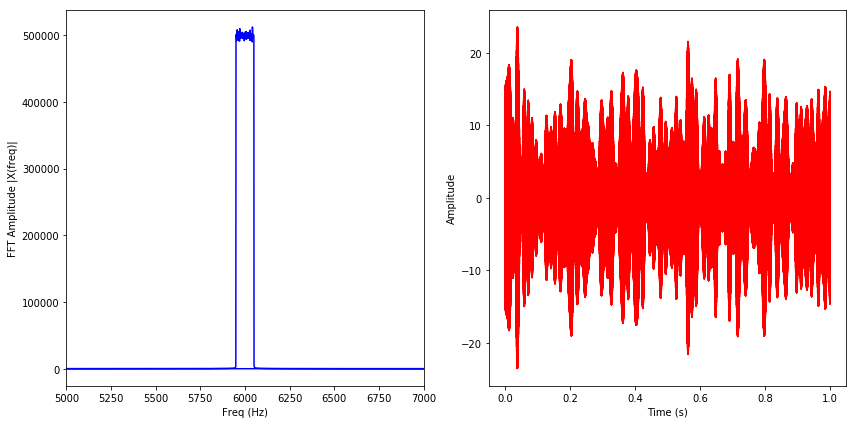

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.plot(freq, abs(amp), 'b')#, markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(5.e3,7.e3)

plt.subplot(122)
plt.plot(t, amp2, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

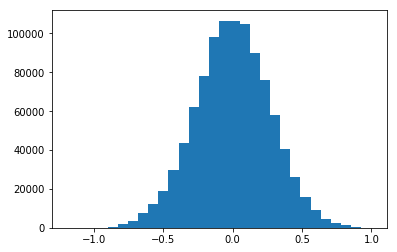

In [ ]:
plt.hist(amp2,30);

In [ ]:
import numpy as np
from scipy.stats import norm

mu, std = norm.fit(amp2)
mu, std

((-3.321801603728147e-07+0j), (0.27015988719105594+0j))

In [ ]:
np.std(amp2)

0.2937334433210347

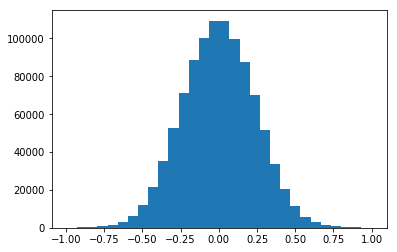

In [ ]:
plt.hist(amp2,30);

In [ ]:
np.std(amp2)

0.33597959694492485

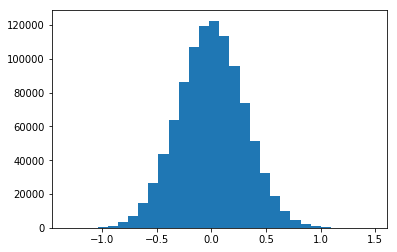

In [ ]:
plt.hist(np.random.normal(0,.3,size=len(freq)),30);

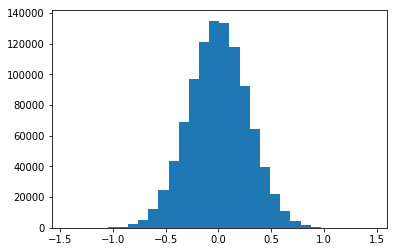

In [ ]:
plt.hist(np.random.normal(0,.28,size=len(freq)),30);

In [ ]:
13+(22-13)/2.

17.5

In [ ]:
def band_limited_noise_kevin(center_freqs,bandwidth, amplitude=1,samples=1.e6, samplerate=1.e6): #samples=10.e4, samplerate=200100):
    signals=[]
    t = np.linspace(0, samples/samplerate, samples)
    signal=np.random.normal(0,0.27,size=len(t))
    X = np.fft.fft(signal)     
    N = len(X)
    freqs=np.fft.fftfreq(N)*samplerate
    if type(center_freqs)==float:
        center_freqs=[center_freqs]
    filtered_X=np.zeros(N,dtype=complex)
    for cent in center_freqs:
        min_freq, max_freq=cent-bandwidth/2.,cent+bandwidth/2.
        indmin,indmax= int(min_freq/samplerate*N),int(max_freq/samplerate*N)
        filtered_Xi=np.zeros(indmin)
        filtered_Xi=np.append(filtered_Xi,X[indmin:indmax])
        filtered_Xi=np.append(filtered_Xi,np.zeros(N-indmax))
        filtered_X+=filtered_Xi    
    filtered_signal=np.fft.ifft(filtered_X)
    filtered_signal/=max(abs(filtered_signal))
    filtered_X_check=np.fft.fft(filtered_signal)   
    return freqs, filtered_X_check,t,filtered_signal

/home/staq/.virtualenvs/labrad/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/staq/.virtualenvs/labrad/local/lib/python2.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


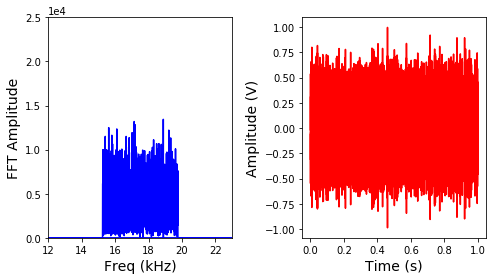

In [ ]:
freq, amp,t,amp2=band_limited_noise_kevin([17.5e3], 4.5e3)
plt.figure(figsize = (7, 4))
plt.subplot(121)

plt.plot(freq/1e3, abs(amp), 'b')#, markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (kHz)',fontsize=14)
plt.ylabel('FFT Amplitude',fontsize=14)
plt.ylim(0.e3,25.e3)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.xlim(12,23)

plt.subplot(122)
plt.plot(t, amp2, 'r')
#plt.ylim(-1,1)
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Amplitude (V)',fontsize=14)
plt.tight_layout()

/home/staq/.virtualenvs/labrad/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


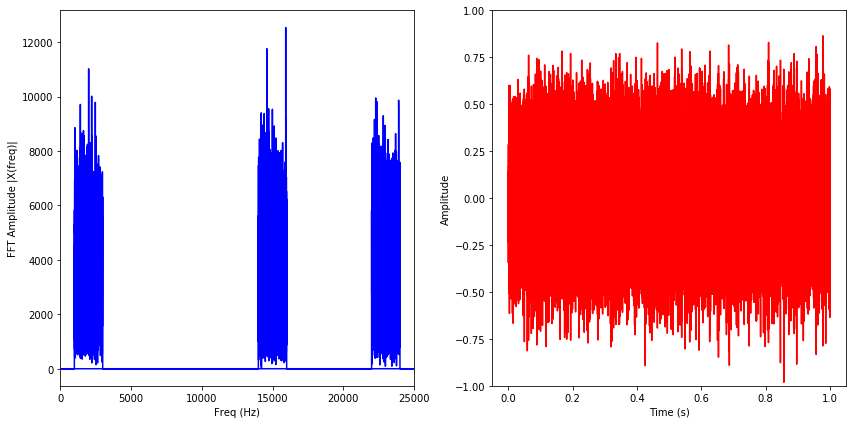

In [ ]:
freq, amp,t,amp2=band_limited_noise_kevin([2.e3,23.e3,15.e3], 2*1.e3)
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.plot(freq, abs(amp), 'b')#, markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0.e3,freq[np.argwhere(abs(amp)>5000)[-1][0]]+1.e3)

plt.subplot(122)
plt.plot(t, amp2, 'r')
plt.ylim(-1,1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

In [ ]:
np.argwhere(abs(amp)>5000)[-1]

array([3995])

In [ ]:
def write_whitenoise(center):
    freq, amp,t,amp2=band_limited_noise_kevin(center, 2*1.e3)  
    
    siiig=list(np.real(amp2))
    f = open(str(int(center/1.e3))+'white_kevin'+'.csv', "w")
    for i in range(len(siiig)):
        f.write(str(siiig[i]))
        f.write(",\n")
    f.close()

In [ ]:
write_whitenoise(12.e3)
write_whitenoise(4.e3)


/home/staq/.virtualenvs/labrad/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/staq/.virtualenvs/labrad/local/lib/python2.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


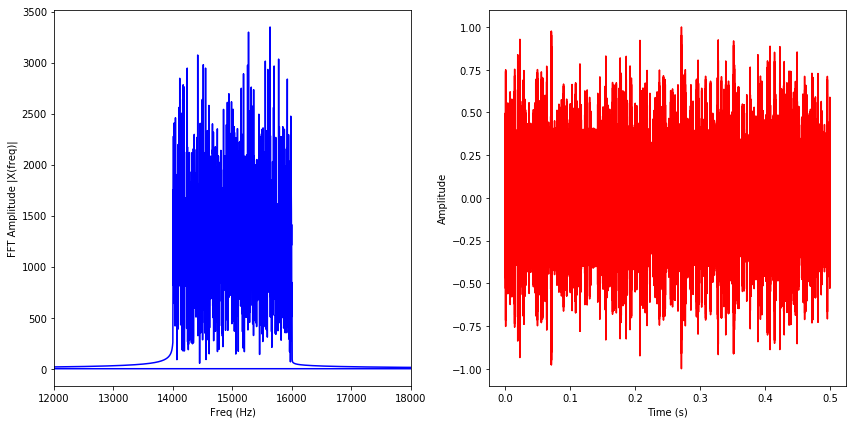

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.plot(freq, abs(amp), 'b')#, markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(12.e3,18.e3)

plt.subplot(122)
plt.plot(t, amp2, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

In [ ]:
def read_csv1(file):
    csvfile = list(csv.reader(open(file+str('.csv'))))
    amp=[float(i[0]) for i in csvfile]
    X = np.fft.fft(amp)
    N = len(X)
    freqs=np.array([np.fft.fftfreq(N)*.5e6])[0]
    plt.figure(figsize = (12, 6))
    plt.plot(freqs,X)
    plt.xlim(0.e3,17.e3);
    return amp

In [ ]:
len(a)

250000

/home/staq/.virtualenvs/labrad/local/lib/python2.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


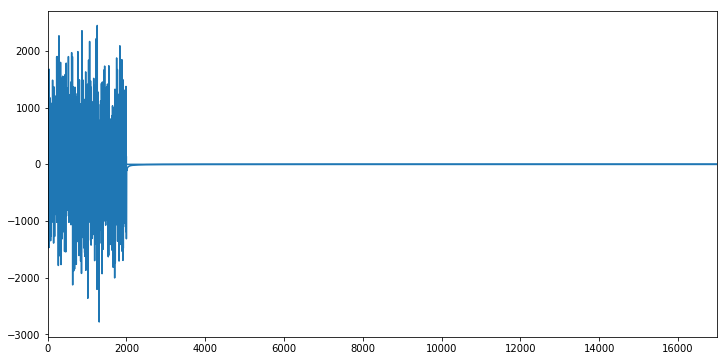

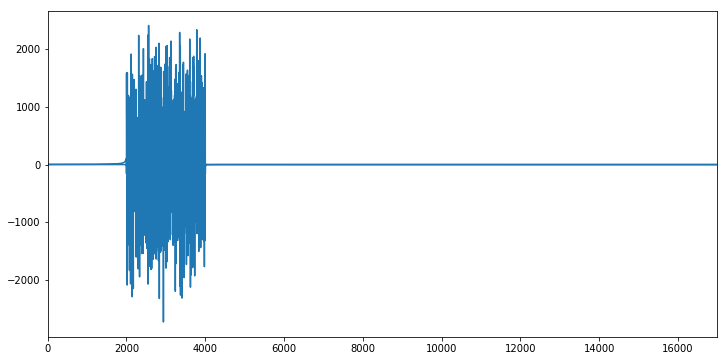

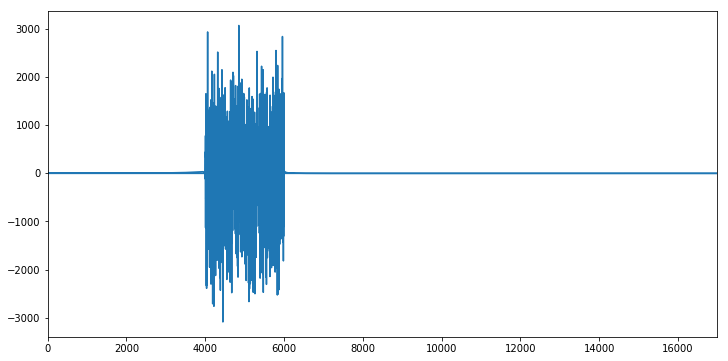

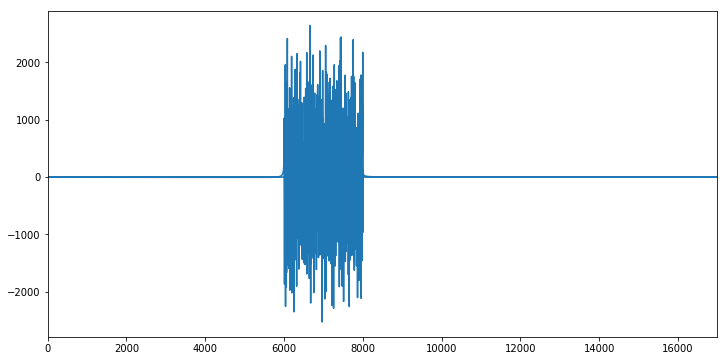

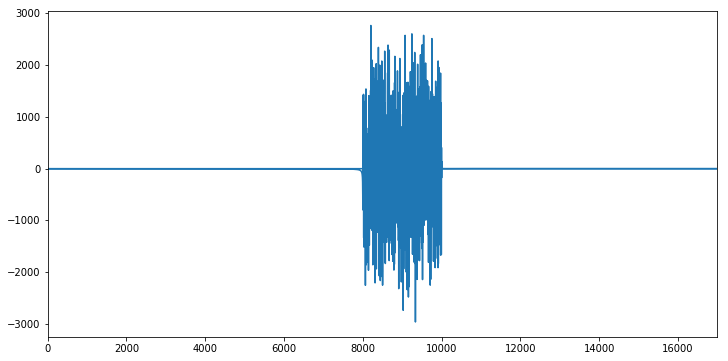

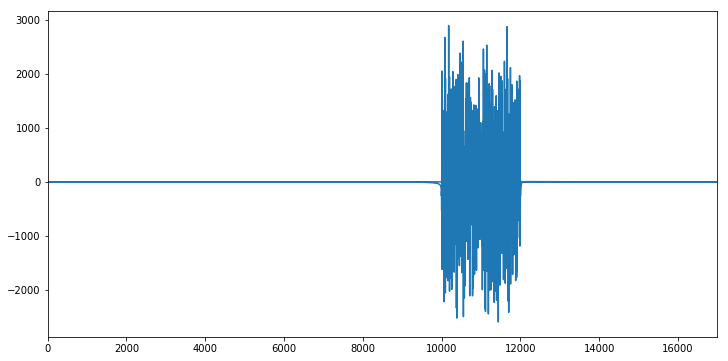

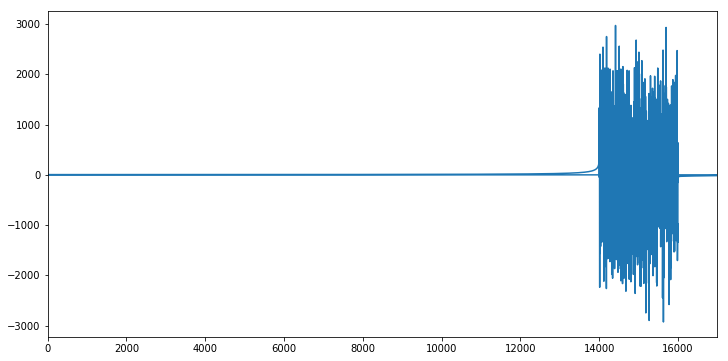

In [ ]:
a=read_csv1('whitenoise1')
b=read_csv1('whitenoise3')
c=read_csv1('whitenoise5')
d=read_csv1('whitenoise7')
e=read_csv1('whitenoise9')
f=read_csv1('whitenoise11')
g=read_csv1('whitenoise15')

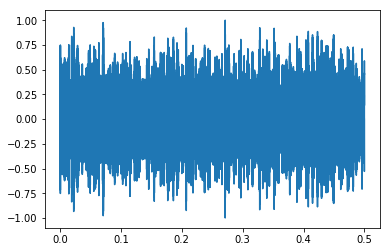

In [ ]:
plt.plot(np.linspace(0, len(g)/.5e6, len(g)),g)

In [ ]:
def read_csv1(file):
    csvfile = list(csv.reader(open(file+str('.csv'))))
    amp=[float(i[0]) for i in csvfile]
    X = np.fft.fft(amp)
    N = len(X)
    freqs=np.array([np.fft.fftfreq(N)*.5e6])[0]
    plt.figure(figsize = (12, 6))
    plt.plot(freqs,X)
    plt.xlim(0.e3,max(freqs));
    return amp

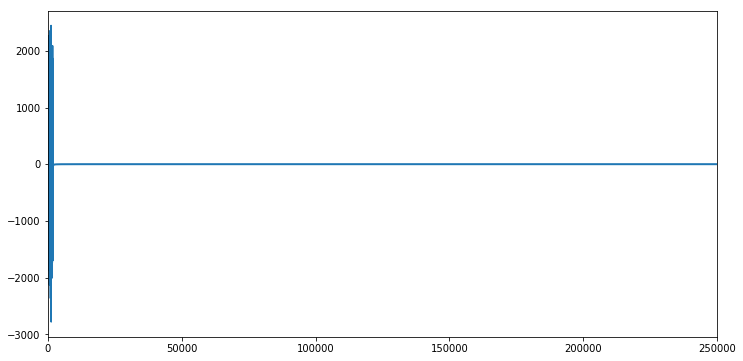

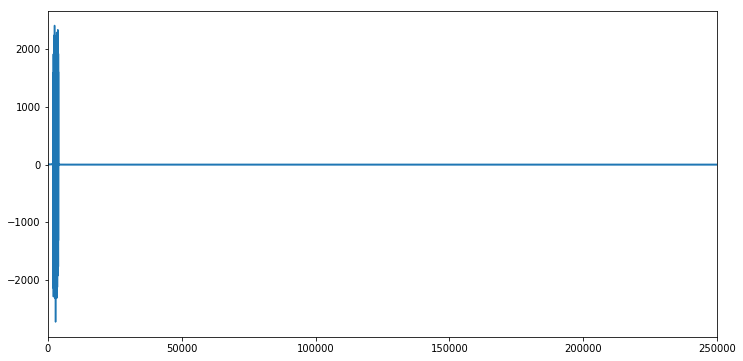

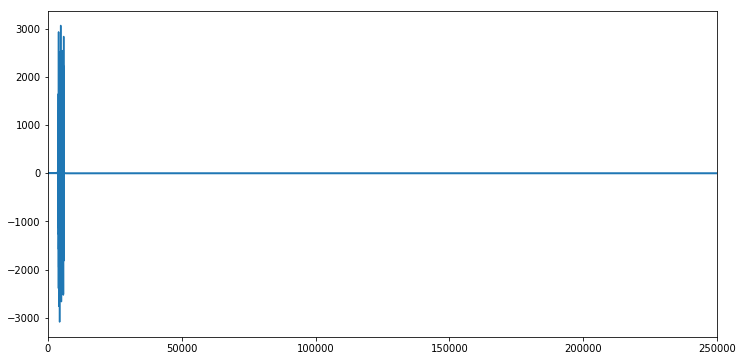

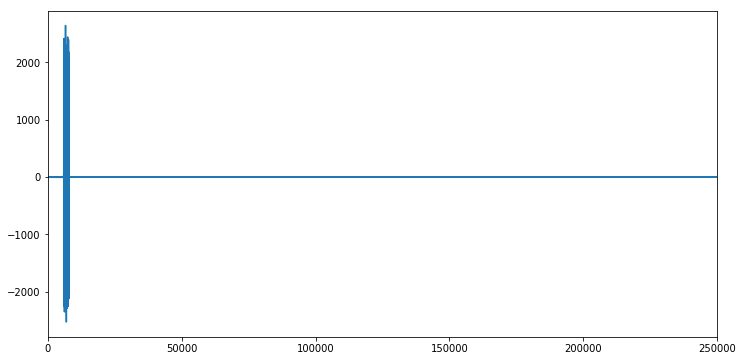

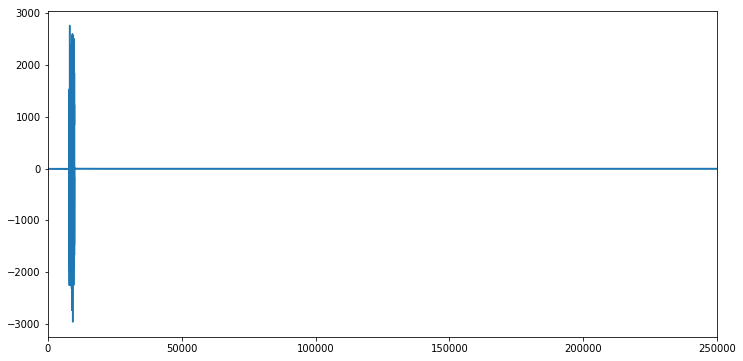

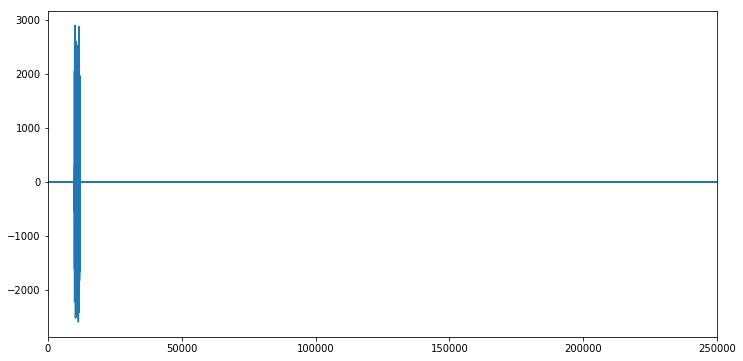

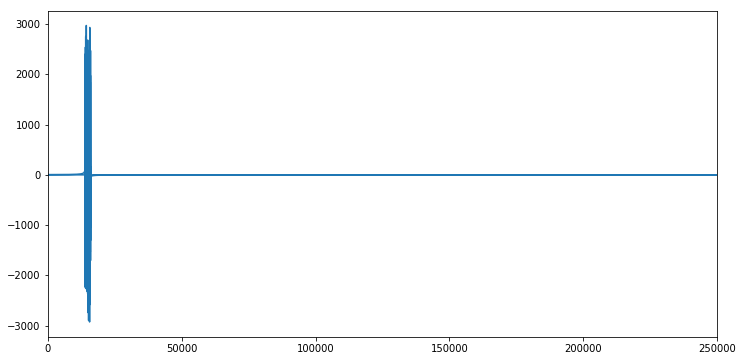

In [ ]:
a=read_csv1('whitenoise1')
b=read_csv1('whitenoise3')
c=read_csv1('whitenoise5')
d=read_csv1('whitenoise7')
e=read_csv1('whitenoise9')
f=read_csv1('whitenoise11')
g=read_csv1('whitenoise15')

In [ ]:
def read_csv1(file):
    csvfile = list(csv.reader(open(file+str('.csv'))))
    amp=[float(i[0]) for i in csvfile]
    X = np.fft.fft(amp)
    N = len(X)
    freqs=np.array([np.fft.fftfreq(N)*1.e6])[0]
    plt.figure(figsize = (12, 6))
    plt.plot(freqs,X)
    plt.xlim(0.e3,33.e3);
    return amp

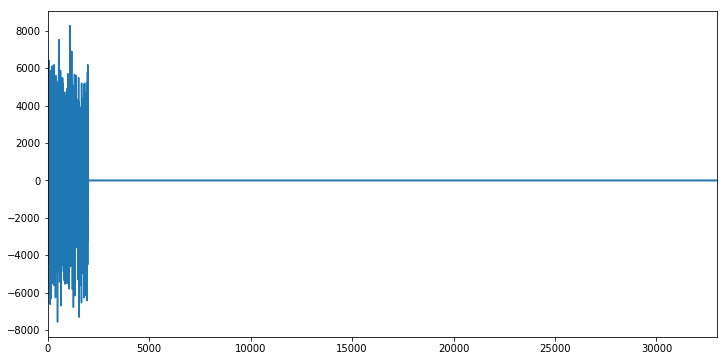

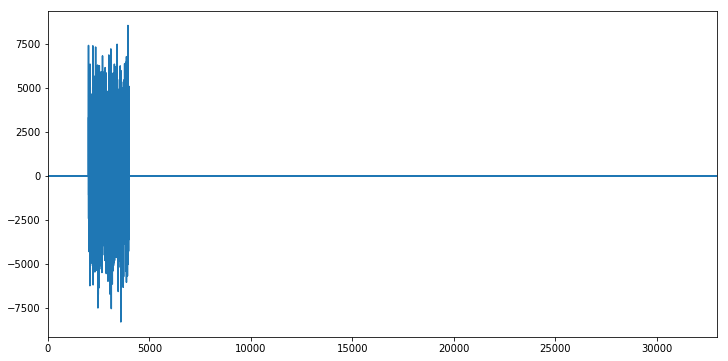

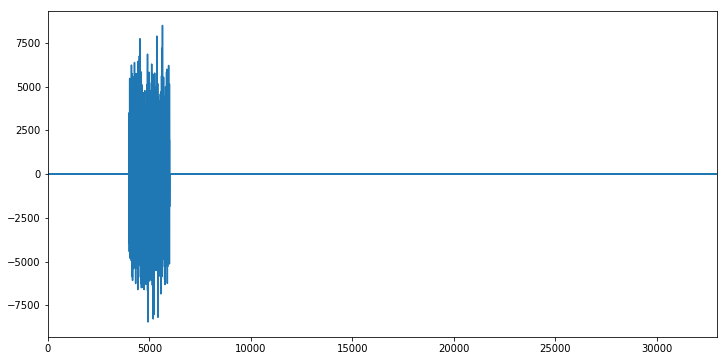

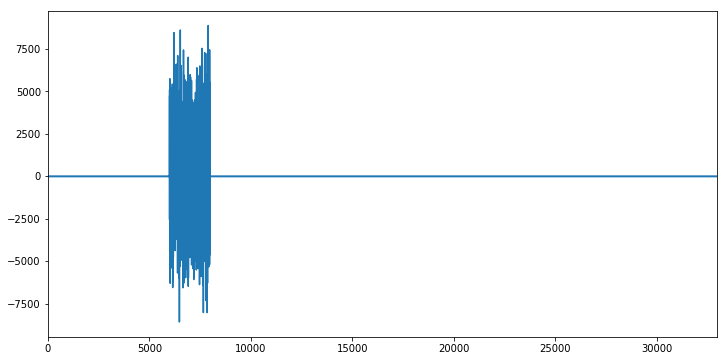

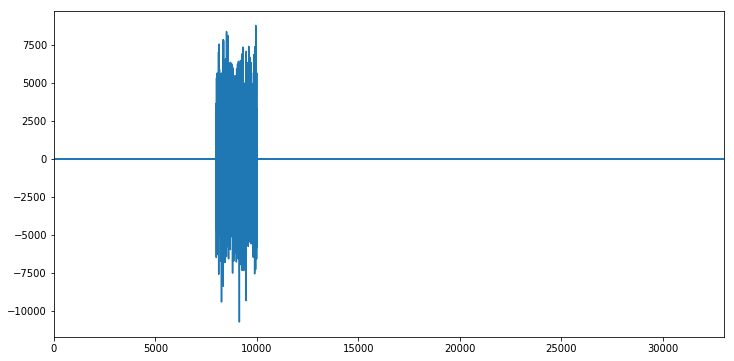

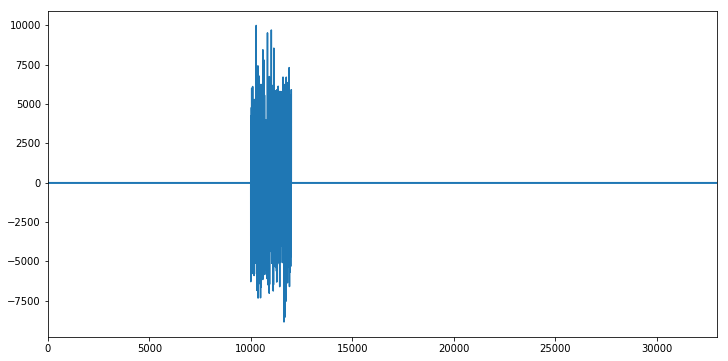

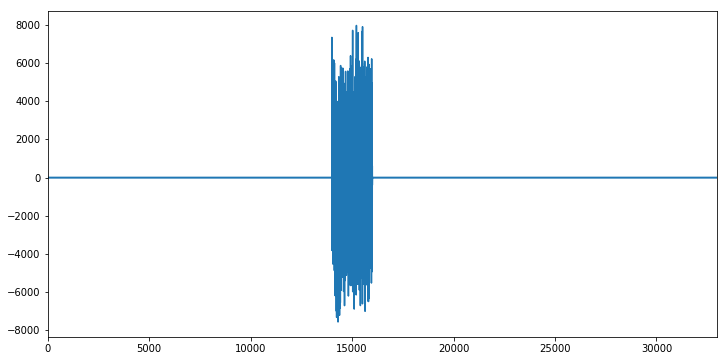

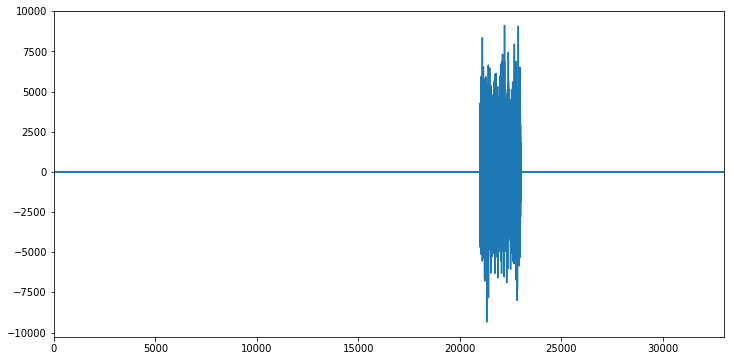

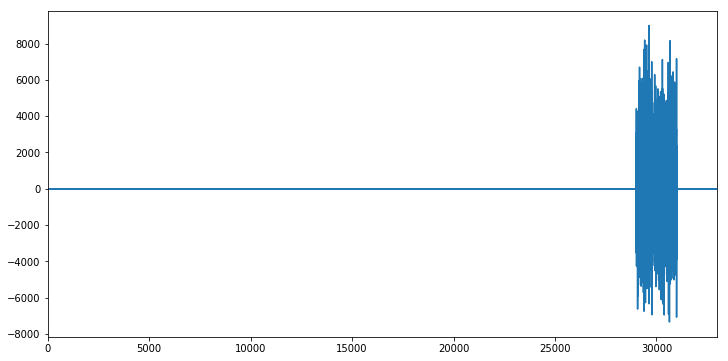

In [ ]:
a=read_csv1('1white_kevin')
b=read_csv1('3white_kevin')
b=read_csv1('5white_kevin')
b=read_csv1('7white_kevin')
b=read_csv1('9white_kevin')
b=read_csv1('11white_kevin')
b=read_csv1('15white_kevin')
b=read_csv1('22white_kevin')
b=read_csv1('30white_kevin')

# External vs Internal Noise @15kHz

## Single Signal

/home/staq/.virtualenvs/labrad/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/staq/.virtualenvs/labrad/local/lib/python2.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


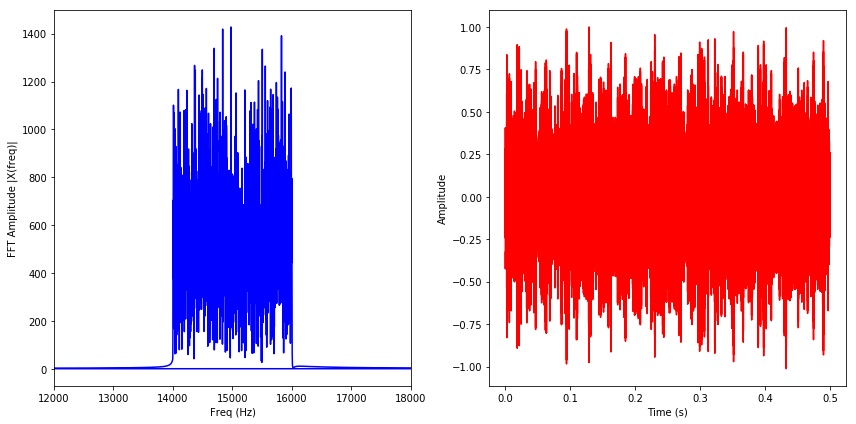

In [ ]:
freq, amp,t,amp2=band_limited_noise(15.e3, 2*1.e3)
#t=np.arange(0,.004,.000001)
#signal=np.sin(2*np.pi*3e3*t)
#freq, amp,t,amp2=np.fft.fftfreq(len(signal)),np.fft.fft(signal),t,signal

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.plot(freq, abs(amp), 'b')#, markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(12.e3,18.e3)

plt.subplot(122)
plt.plot(t, amp2, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

In [ ]:

aaaa,sss=np.histogram(amp2,20)
sss.std()

0.6093816018050824

In [ ]:
# siiig=list(np.real(amp2))
# f = open("trialwhitenoise1.csv", "w")
# for i in range(len(siiig)):
#     f.write(str(siiig[i]))
#     f.write(",\n")
# f.close()

## Signal out of AWG

In [ ]:
def read_csv(file):
    csvfile = list(csv.reader(open(file+str('.csv'))))
    csv_dic = []

    for row in csvfile:
            csv_dic.append(row);
    freq,amp = [],[]

    for row in csv_dic:
        freq.append(float(row[0]))
        amp.append(float(row[1]))
    return [freq,amp]


In [ ]:
data_int_far=read_csv('15kint')
data_ext_far=read_csv('15KEXT')

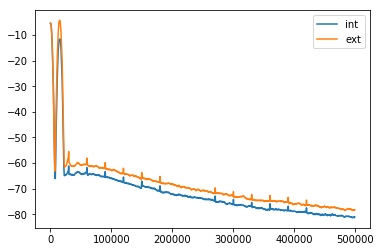

In [ ]:
plt.plot(data_int_far[0],data_int_far[1],label='int')
plt.plot(data_ext_far[0],data_ext_far[1],label='ext')
plt.legend()

In [ ]:
data_int_close=read_csv('15kint2')
data_ext_close=read_csv('15KEXT2')

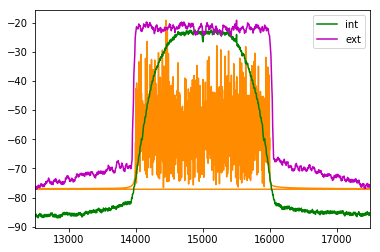

In [ ]:
plt.plot(freq, (max(data_ext_close[1])-min(data_ext_close[1]))*abs(amp)/max(abs(amp))+min(data_ext_close[1]), color='darkorange')

plt.plot(data_int_close[0],data_int_close[1],'g',label='int')
plt.plot(data_ext_close[0],data_ext_close[1],'m',label='ext')
plt.xlim(min(data_ext_close[0]),max(data_ext_close[0]))

plt.legend()

# Multiple points

## Signal

/home/staq/.virtualenvs/labrad/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


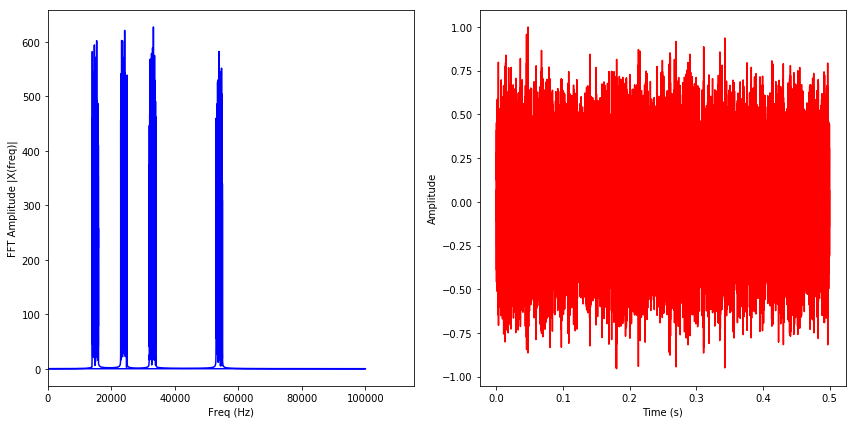

In [ ]:
freq, amp,t,amp2=band_limited_noise([15.e3,24e3,33.e3,54.e3], 2*1.e3)
#t=np.arange(0,.004,.000001)
#signal=np.sin(2*np.pi*3e3*t)
#freq, amp,t,amp2=np.fft.fftfreq(len(signal)),np.fft.fft(signal),t,signal

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.plot(freq, abs(amp), 'b')#, markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, max(freq[np.argwhere(abs(amp)>1)])[0]*2)

plt.subplot(122)
plt.plot(t, amp2, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

## Signal out of AWG

In [ ]:
data_multi=read_csv('multiplepnts')

(0.0, 100000.0)

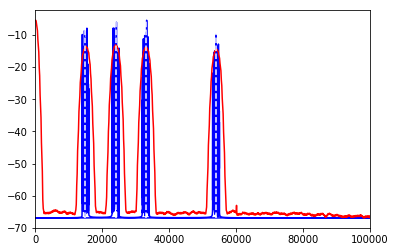

In [ ]:
plt.plot(freq, (max(data_multi[1])-min(data_multi[1]))*abs(amp)/max(abs(amp))+min(data_multi[1]), 'b')

plt.plot(data_multi[0],data_multi[1],'r')

plt.vlines(15.e3, min(data_multi[1]), max(data_multi[1]), colors='w', linestyles='dashed',zorder=3)
plt.vlines(24.e3, min(data_multi[1]), max(data_multi[1]), colors='w', linestyles='dashed',zorder=4)
plt.vlines(33.e3, min(data_multi[1]), max(data_multi[1]), colors='w', linestyles='dashed',zorder=5)
plt.vlines(54.e3, min(data_multi[1]), max(data_multi[1]), colors='w', linestyles='dashed',zorder=6)

plt.xlim(min(data_multi[0]),max(data_multi[0]))
